# MAT281 - Tarea 1

## SVD y Gatitos 

En este ejercicio utilizaremos la descomposición valor singular con tal de comprimir imágenes, si bien hay algoritmos mucho mejores para esto, será un ejercicio muy ilustrativo. 

### Recuerdo

La descomposición SVD de una matriz $A$ de tamaño $m \times n$ posee la siguiente forma 
$$
A = U \Sigma V^H
$$
donde $\Sigma$ es diagonal $m \times n$, mientras que $U$ y $V$ son matrices unitarias $m \times m$ and $n \times n$, respectivamente. Los elementos diagonales de $\Sigma$ son no-negativos y aquellos valores positivos son llamados **valores singulares** de $A$. Como convención los valores singulares se listan en orden decreciente a lo largo de la diagonal. Las columnas de $U$ y $V$ son llamadas **vectores singulares** izquierdos y derechos respectivamente.

PD: Recuerda que $A^H = \bar{A}^\top$, es decir, la matriz traspuesta de la matriz conjugada.

In [4]:
import numpy as np
from scipy.linalg import svd

np.random.seed(42)  # Para reproducibilidad de resultados

Por ejemplo para una matriz de $2 \times 2$:

In [121]:
A = np.array([[0.1, 0.5], [0.4, 0.8]])
u, s, vh = svd(A)
u

array([[-0.48835631, -0.87264432],
       [-0.87264432,  0.48835631]])

#### Ejercicio 1

(5 puntos)

Define la función `svd_validaton` tal que:

1. El _input_ sea un arreglo bidimensional `A` de tamaño $m \times n$.
2. Obtenga la descomposición valor singular de `A`.
3. Retorne `True` o `False` si es que se cumple la igualdad 
$$
A = \sum_{l=1}^{\min(m, n)} \sigma_l \; u_l v_l^H,
$$
donde $\sigma_l$ corresponden a los valores singulares de $A$, mientras que $u_i$ y $v_j$ a las columnas de $U$ y $V$ respectivamente. Hint: Utiliza `np.allclose` con la tolerancia por defecto.

In [139]:
def svd_validation(A):
    m,n=A.shape
    l, v = np.linalg.eig((A.T)@A)
    l=l[::-1]
    v=v[:,::-1]
    vH=v.T
    sigma=np.zeros(A.shape)
    U=np.zeros((m,m))
    Aprueba=np.zeros((m,n))
    for i in range(0,min(m,n)):
        sigma[i,i]=l[i]**0.5
        U[:,i]=A@(v[:,i])/(l[i]**0.5)
        Aprueba+=sigma[i,i]*(np.outer(U[:,i],vH[i,:])) #entendi la fórumla de otra forma, por eso lo escribo de esta que si debiese dar
    return np.allclose(A,Aprueba)
    #return np.allclose(A,Aprueba) #Para esta matriz en partícular el problema ocurre con U debido a que el segundo vector propio considerado al reordenar v da con signos cambiados

In [141]:
A_test = np.random.randint(100, size=(20, 5))
svd_validation(A_test)

True

### Geometría

Considerar una matriz `A` como un operador lineal tiene una interpretación geométrica muy sencilla, transforma una (hyper)-esfera en una (hyper)-elipse. Por ejemplo, consideremos una esfera unitaria en $\mathbb{R}^2$.

In [142]:
import matplotlib.pyplot as plt
%matplotlib inline

In [143]:
def show_circle(circle):
    plt.plot(circle[0, :], circle[1, :])
    plt.axis('image');

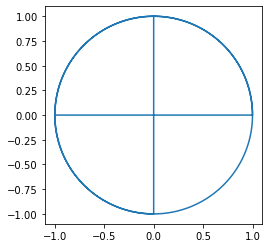

In [144]:
t = np.linspace(0, 3.5 * np.pi , num=300)
l = np.linspace(-1, 1, num=10)
z = np.zeros_like(l)
circle = np.array(
    [
        np.concatenate([l, np.cos(t), z]),
        np.concatenate([z, np.sin(t), l])
    ]
)

show_circle(circle) 

Luego, al utilizar `A` como un operador lineal, es decir $A C$.

In [145]:
print(A)

[[0.1 0.5]
 [0.4 0.8]]


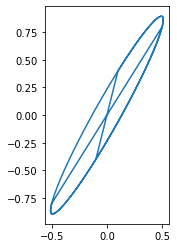

In [146]:
show_circle(A @ circle)

#### Ejercicio 2

(5 puntos)

* Obtén la descomposición SVD de $A$, tal que $A = U \Sigma V^H$.
* Grafica el resultado de aplicar los siguientes operadores lineales a la circunferencia unitaria:
    - $U$
    - $\Sigma$
    - $V^H$
* Explica con tus palabras la transformación de la circunferencia unitaria luego de aplicar los operadores anteriores, ¿Influye en algo que $U$ y $V$ sean unitarias?
* ¿Qué relación tienen los operadores anteriores respecto a aplicar el operador lineal $A$?

In [152]:
u, s, vh = svd(A)
for i in range(0,s.size):
    sigma[i,i]=s[i]

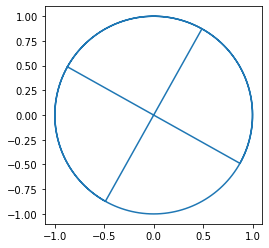

In [147]:
show_circle(u@ circle)

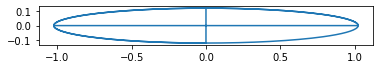

In [153]:
show_circle(sigma@circle)

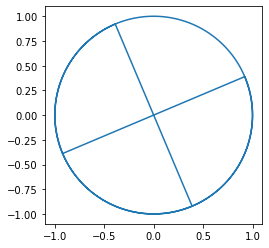

In [73]:
show_circle(vh@ circle)

__Respuesta:__ La transformación lineal consiste en girar los ejes de referencia de la circunferencia.
U y V son los nuevos ejes de referencia,un caso de aplicación puede ser el círculo de mohr, dónde se pasa a trabajar en coordenadas dónde los terminos cruzados son 0.
Sigma influye en el tamaño de las dimensiones.
Influye solo en el tamaño de la circuenferencia, pero se mantienen las mismas direcciones.

__Respuesta:__ La relación que se tiene, es que al aplicar A, primero se Aplicaria vh, a esa transformación lineal se le aplica sigma y a esa ultima tranformacion lineal se le aplica U.

### Aproximación Rango Menor

Existen muchas maneras de expresar una matriz como una suma de matrices de menor rango, por ejemplo:

$$
\begin{bmatrix}
a & b \\
c & d 
\end{bmatrix}
= 
\begin{bmatrix}
a & 0 \\ 0 & 0  
\end{bmatrix}
+ 
\begin{bmatrix}
0 & b \\ 0 & 0 
\end{bmatrix}
+ 
\begin{bmatrix}
0 & 0 \\ c & 0 
\end{bmatrix}
+
\begin{bmatrix}
0 & 0 \\ 0 & d 
\end{bmatrix}.
$$

Cada una de las matrices del lado derecho pueden tener rango a lo más 1.

En el primer ejercicio demostraste que la descomposición SVD $A$ puede ser expresada como una suma de matrices. Sin embargo, cada una de estas matrices tiene rango 1! Esto pues cada una de estas matrices se forma a partir de los productos externos entre los vectores $u_l$ y $v_l$, es decir $u_l v_l^H$.

La pregunta natural es:

_¿Cómo obtener una buena aproximación de $A$ utilizando matrices de rango muy bajo?_

Bueno, aquí va un teorema.

__Teorema 1:__



Sea $A$ matriz de tamaño $m \times n$. Para cualquier $0 \le \ell \le r = \text{rank}(A)$, se define la matriz 
$$
A_\ell = \sum_{j=1}^{\ell} \sigma_j u_j v_j^*,
$$
utilizando los valores singulares $\sigma_j$ y los vectores singulares (izquierdos y derechos) $u_j, v_j$ de $A$,  i.e., $A_\ell$ se compone de la suma de los primeros $\ell$ términos de la descomposición SVD escrita como una suma de productor externos. Luego, el mínimo de  $\| A - B \|_F$ sobre todas las matrices $B$ de tamaño $m \times n$ y rango no mayor a $\ell$ se obtiene por $\| A - A_\ell \|_F$ y el mínimo que se alcanza es  $(\sigma_{\ell+1}^2 + \cdots + \sigma_r^2)^{1/2}$.

Recuerda que la norma de Frobenius se define como

$$
\| A \|_F = \bigg( \sum_{i, j} |A_{ij}|^2 \bigg)^{1/2}.
$$

Motivaremos el ejercicio utilizando imágenes en escala de grises ya que es muy intuitivo, fácil de ver y se puede considerar que la imagen es una matriz.

In [148]:
from pathlib import Path
from PIL import Image

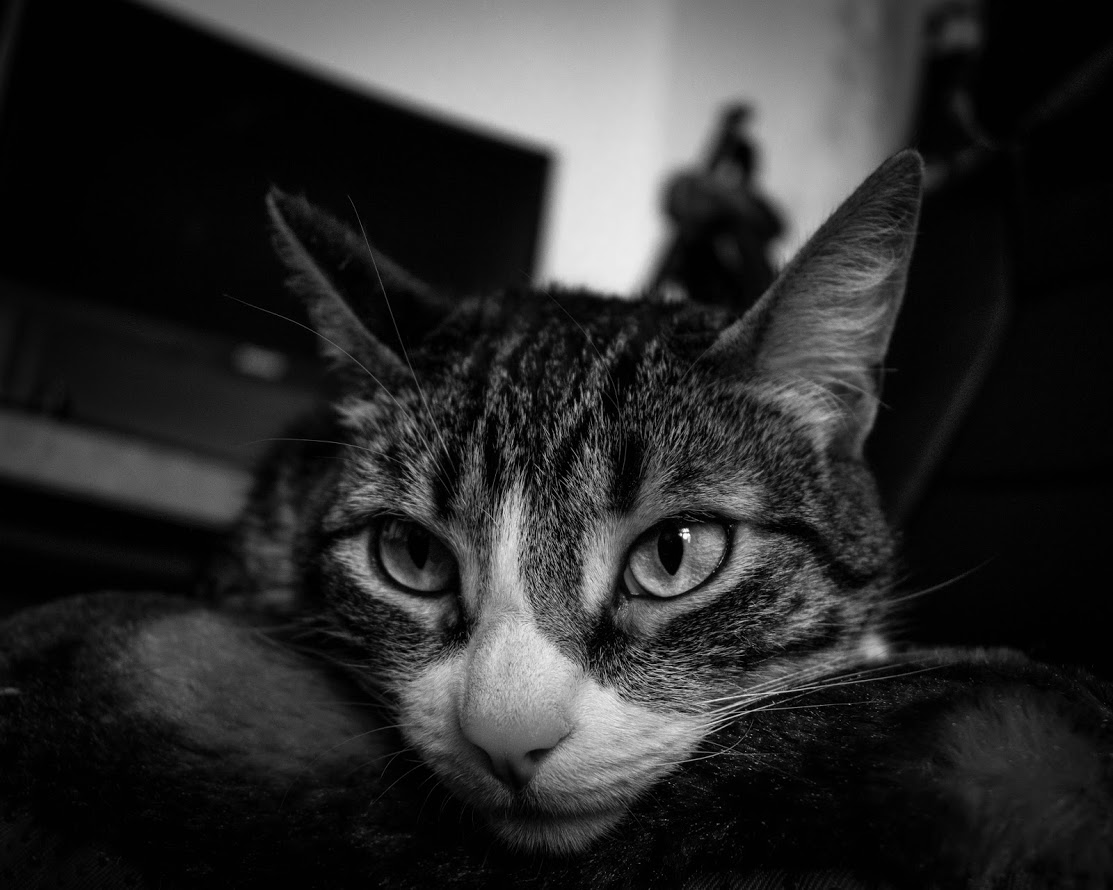

In [150]:
# Utilizaremos una foto de una de mis gatitas c:
cat = Image.open(Path().resolve().parent / "images" / "coyoya.jpg").convert('L')
cat

Para convertirla en un numpy array basta con:

In [151]:
cat_np = np.array(cat)
print(cat_np.shape)

(890, 1113)


#### Ejercicio 3

(10 puntos)

Define la función `low_rank_svd_approximation` tal que:

* Los inputs sean $A$ (la imagen convertida un `np.array` de dimensión 2) y un valor entero $\ell$ que represente la cantidad de términos a sumar de la despomposición SVD (respecto al teorema anterior).
* Retorne la aproximación $A_\ell$
* Imprima el error de la aproximación utilizando la norma de Frobenius.

Luego prueba tu función y observa la imagen con distintos valores de $\ell$.

In [261]:
def low_rank_svd_approximation(A, l):
    u, s, vh = svd(A)
    Al=np.zeros(A.shape)
    for i in range(0,l):
        Al+=s[i]*(np.outer(u[:,i],vh[i,:]))
    error=0
    for i in range(l,np.linalg.matrix_rank(A)):
        error=error+Al[i,i]**2
    error=error**0.5
    print(f"El error es: {error}")
    return Al

    # FIX ME PLEASE #

El error es: 1519.6990361408764


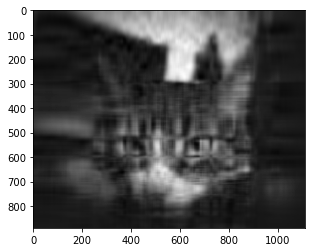

In [262]:
cat10 = low_rank_svd_approximation(cat_np, l=10)
plt.imshow(cat10, cmap='gray');

El error es: 1757.295413923718


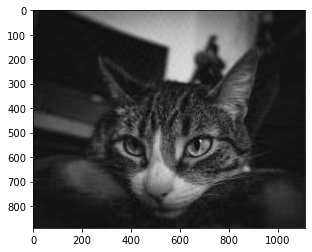

In [263]:
cat50 = low_rank_svd_approximation(cat_np, l=50)
plt.imshow(cat50, cmap='gray');

#### Ejercicio 4

(15 puntos)

En el ejercicio anterior fijaste un rango máximo y obtuviste la aproximación, sin embargo, en otro contexto, te gustaría fijar una tolerancia de error y obtener la mejor aproximación.

Define la función `low_rank_svd_tol_approximation` tal que:

* Los inputs sean $A$ (la imagen convertida un `np.array` de dimensión 2) y $\varepsilon$ (tolerancia relativa) tal que
$$
\left(\frac{\sigma_{\ell+1}^2 + \cdots + \sigma_r^2}{\sigma_1^2 + \cdots + \sigma_r^2}\right)^{1/2} \le \varepsilon.
$$
* Imprima $\ell(\varepsilon)$, es decir, el mayor rango aproximado de $A$ tal que el error de aproximación sea a lo más $\varepsilon$.
* Retorne la aproximación $A_{\ell(\varepsilon)}$

Luego prueba tu función y observa la imagen con distintos valores de $\varepsilon$.

In [310]:
def low_rank_svd_tol_approximation(A, tol):
    u, s, vh = svd(A)
    Al=np.zeros(A.shape)
    denominador=0
    for i in range(0,np.linalg.matrix_rank(A)):
        Al+=s[i]*(np.outer(u[:,i],vh[i,:]))
    for i in range(0,np.linalg.matrix_rank(A)):
        denominador=denominador+Al[i,i]**2
    margen=tol*(denominador**0.5)
    numerador=0
    contador=np.linalg.matrix_rank(A)
    while margen>numerador:
        contador=contador-1
        numerador=0
        Al2=np.zeros(A.shape)
        for i in range(0,contador):
            Al2+=s[i]*(np.outer(u[:,i],vh[i,:]))
        for i in range(contador,np.linalg.matrix_rank(A)):
            numerador=numerador+Al2[i,i]**2
        numerador=numerador**0.5
    Al2=np.zeros(A.shape)
    for i in range(0,contador):
            Al2+=s[i]*(np.outer(u[:,i],vh[i,:]))
    print(kk)
    print(contador)
    return Al2

In [275]:
cat_e1 = low_rank_svd_tol_approximation(cat_np, tol=1.e-1)
plt.imshow(cat_e1, cmap='gray');

KeyboardInterrupt: 

0.0
1711.4594452959786
1660.9868070734262
2


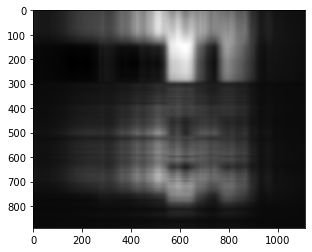

In [238]:
cat_e2 = low_rank_svd_tol_approximation(cat_np, tol=1.e-2)
plt.imshow(cat_e2, cmap='gray');

#### Ejercicio 5

(5 puntos)

Utilizando alguna imagen de tu preferencia utiliza ambas

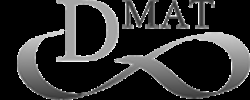

In [282]:
your_img_name = "dmat.png"
your_img = Image.open(Path().resolve().parent / "images" / your_img_name ).convert('L')
your_img

In [296]:
your_img_np = np.array(your_img)

100

El error es: 674.6417613438547


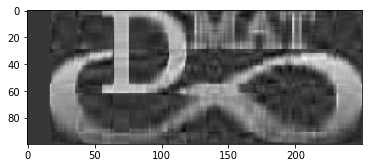

In [288]:
your_img10 = low_rank_svd_approximation(your_img_np, l=10)
plt.imshow(your_img10, cmap='gray');

El error es: 668.8904949925611


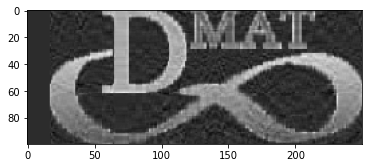

In [285]:
your_img50 = low_rank_svd_approximation(your_img_np, l=20)
plt.imshow(your_img50, cmap='gray');

57.144462200605346
94


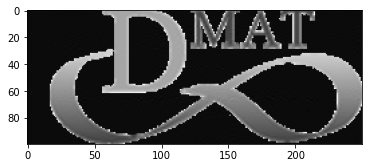

In [309]:
your_img_e1 = low_rank_svd_tol_approximation(your_img_np, tol=1.e-1)
plt.imshow(your_img_e1, cmap='gray');

-92.08147729713394
93


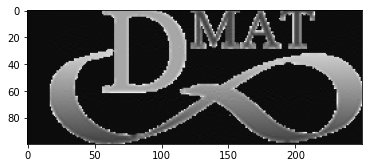

In [307]:
your_img_e2 = low_rank_svd_tol_approximation(your_img_np, tol=1.e-2)
plt.imshow(your_img_e2, cmap='gray');

__Pregunta:__ ¿Será una manera útil de comprimir imágenes en el disco duro o crees que existen otras formas más eficientes?

__Respuesta:__ En partícular tuve que ocupar muchos for para no llamar funciones y que me imprimieran cosas que no se solicitaban, aunque si las funciones igual tenian for's entonces eso hace muy costoso el proceso.
Deben haber formas mejores.

## COVID-19 en Chile

### *¿Cuál es el panorama actual de Chile frente a la pandemia de COVID-19?*

In [311]:
import pandas as pd
from datetime import date

#### Ejercicio 6

(25 puntos)

Se ha hablado mucho últimamente que Magallanes es una región crítica en cuanto a casos confirmados de COVID-19. Este ejercicio busca constatar a través de los datos aquellas aseveraciones con un indicador siemple pero que parece ser efectivo que bautizaremos como _tasa promedio de casos nuevos_, definida como el promedio de nuevos casos cada cien mil habitantes para un umbral de tiempo determinado.

Utiliza el dataframe `covid_comunas` para obtener el dataframe `covid_tasa_promedio_nuevos` que posee las columnas `region`, `comuna`, `promedio_casos_nuevos`, `poblacion` y `tasa_promedio_casos_nuevos` considerando el umbral de tiempo es entre el 1 y 11 de octubre del año 2020.

Para ello considera lo siguiente:

* No consideres registros que tengan código de comuna nulo.
* Rellena todos los registros de casos totales nulos por cero.
* Considera utilizar `melt` u otro método similar para apilar las columnas de fechas particulares en solo dos columnas, `fecha` y `casos_totales`.
* Define la columna `casos_nuevos` como la diferencia entre dos registros consecutivos para una misma comuna
    - No olvides ordenar por fecha
    - El primer registro de cada comuna debe ser nulo.
    - Considera utilizar el método `transform`.
* Filtra por el umbral de tiempo dado.
* Agrupa por región-comuna y luego define la columna `promedio_casos_nuevos` como el promedio de la columna `casos_nuevos`.
* En caso que hayas _dropeado_ la columna `poblacion` la puedes volver a agregar utilizando `merge` u otro método apropiado. Se asume que la población no cambia durante el tiempo.
* Asigna la columna `tasa_promedio_casos_nuevos` como la cantidad promedio de casos nuevos por cada cien mil habitantes.
* Ordena el dataframe resultante por `tasa_promedio_casos_nuevos` de manera descendente.

Información del dataset: [aquí](https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto1).

In [350]:
covid_comunas = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto1/Covid-19.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
)
covid_comunas.head()

,region,codigo_region,comuna,codigo_comuna,poblacion,2020-03-30,2020-04-01,2020-04-03,2020-04-06,2020-04-08,...,2020-10-02,2020-10-05,2020-10-09,2020-10-12,2020-10-16,2020-10-19,2020-10-24,2020-10-26,2020-10-30,tasa
0,Arica y Parinacota,15,Arica,15101.0,247552.0,6.0,6.0,12.0,41.0,63.0,...,8597.0,8772.0,8996.0,9138.0,9343.0,9472.0,9679.0,9763.0,9888.0,3994.3
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,0.0,0.0,0.0,0.0,0.0,...,27.0,28.0,28.0,28.0,28.0,28.0,28.0,28.0,28.0,2270.9
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,0.0,0.0,0.0,0.0,0.0,...,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,7901.2
3,Arica y Parinacota,15,Putre,15201.0,2515.0,0.0,0.0,0.0,0.0,0.0,...,67.0,70.0,70.0,70.0,70.0,70.0,71.0,72.0,72.0,2862.8
4,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,37.0,36.0,36.0,40.0,43.0,43.0,43.0,44.0,36.0,NaN


In [313]:
start_date = "2020-10-01"# FIX ME PLEASE #
end_date = "2020-10-11"# FIX ME PLEASE #

In [372]:
covid_tasa_promedio_nuevos = covid_comunas.loc[lambda x: x['codigo_comuna'].notnull()].fillna(0)
fechas=['2020-03-30', '2020-04-01', '2020-04-03', '2020-04-06', '2020-04-08',
       '2020-04-10', '2020-04-13', '2020-04-15', '2020-04-17', '2020-04-20',
       '2020-04-24', '2020-04-27', '2020-05-01', '2020-05-04', '2020-05-08',
       '2020-05-11', '2020-05-15', '2020-05-18', '2020-05-22', '2020-05-25',
       '2020-05-29', '2020-06-01', '2020-06-05', '2020-06-08', '2020-06-12',
       '2020-06-15', '2020-06-19', '2020-06-23', '2020-06-28', '2020-07-01',
       '2020-07-05', '2020-07-10', '2020-07-13', '2020-07-17', '2020-07-20',
       '2020-07-24', '2020-07-27', '2020-07-31', '2020-08-03', '2020-08-07',
       '2020-08-10', '2020-08-14', '2020-08-17', '2020-08-21', '2020-08-24',
       '2020-08-28', '2020-08-31', '2020-09-04', '2020-09-07', '2020-09-11',
       '2020-09-14', '2020-09-18', '2020-09-21', '2020-09-25', '2020-09-28',
       '2020-10-02', '2020-10-05', '2020-10-09', '2020-10-12', '2020-10-16',
       '2020-10-19', '2020-10-24', '2020-10-26', '2020-10-30']
covid_tasa_promedio_nuevos=covid_tasa_promedio_nuevos.groupby('region')

In [373]:
covid_tasa_promedio_nuevos

__Pregunta:__ ¿Qué puedes observar respecto a las comunas que tienen mayor Tasa Promedio de Casos Nuevos?

__Respuesta:__

#### Ejercicio 7

(15 puntos)

¿Hay correlación entre la cantidad de exámenes PCR y los casos confirmados en cada comuna?


Información del dataset: [aquí](https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto7).

In [ ]:
covid_pcr = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto7/PCR.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
)
covid_pcr.head()

Obtén el dataframe `covid_pcr_melt` utilizando `covid_pcr` tal que:

* Tenga las columnas `region`, `fecha` y `nm_pcr`.
* `fecha` sea del tipo `datetime64`.
* `nm_pcr` sea el número de PCR realizados y rellena los valores nulos por cero.

In [ ]:
covid_pcr_melt = (
    # FIX ME PLEASE #
)

covid_pcr_melt.head()

Obtén el dataframe `covid_casos_melt` utilizando `covid_comunas` tal que:

* Tenga las columnas `region`, `fecha` y `casos_totales`.
* Rellena los valores nulos con cero.
* `fecha` sea del tipo `datetime64`.
* `casos_totales` sea la cantidad de casos totales por región y fecha.

In [ ]:
covid_casos_melt = (
    # FIX ME PLEASE #
)

covid_casos_melt

Finalmente, obtén la serie `covid_corr_casos_pcr` de la siguiente manera:

* Une `covid_pcr_melt` y `covid_casos_melt` a través de _merge_, utilizando la región y la fecha como llave, además conserva todos los registros (tanto derecha como izquierda).
* Rellena los números de PCR con el valor cero.
* Haz un `ffill` a los casos totales.
* Agrupa por región y obtén la correlación entre `nm_pcr` y `casos_totales`.
* Ordena los valores ascendentemente.

In [ ]:
covid_corr_casos_pcr = (
    # FIX ME PLEASE #
)

covid_corr_casos_pcr

__Pregunta:__ ¿Qué puedes inferir del análisis anterior? ¿Se condice con tu sentido común?

__Respuesta:__

#### Ejercicio 8

(10 puntos)

Propón y responde una pregunta que puedas resolver analizando dos o más conjuntos de datos del repositorio oficial de datos COVID-19 del Ministerio de Ciencia, Tecnología e Innovación de Chile ([link](https://github.com/MinCiencia/Datos-COVID19)).

Se evaluará originalidad, análisis de datos, calidad de la pregunta y respuesta.

__Pregunta:__

In [ ]:
# FIX ME PLEASE #

__Respuesta:__

#### Ejercicio 9

(10 puntos)

Propón y responde una pregunta que puedas resolver analizando dos o más conjuntos de datos del repositorio oficial de datos COVID-19 del Ministerio de Ciencia, Tecnología e Innovación de Chile ([link](https://github.com/MinCiencia/Datos-COVID19)). Sin utilizar ninguno de los datasets que hayas utilizado en el ejercicio 8.

Se evaluará originalidad, análisis de datos, calidad de la pregunta y respuesta.

__Pregunta:__

In [ ]:
# FIX ME PLEASE #

__Respuesta:__